# RNN Model + Johnson 

## Load Pacakage

In [1]:
from pandas import read_csv
import numpy as np
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

## Load Data

Reading data and splitting into train and test by extract 20% of data into test data.

In [2]:
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
 
sunspots_url = 'data/RNN_Johnson.csv'
train_data, test_data, data = get_train_test(sunspots_url)

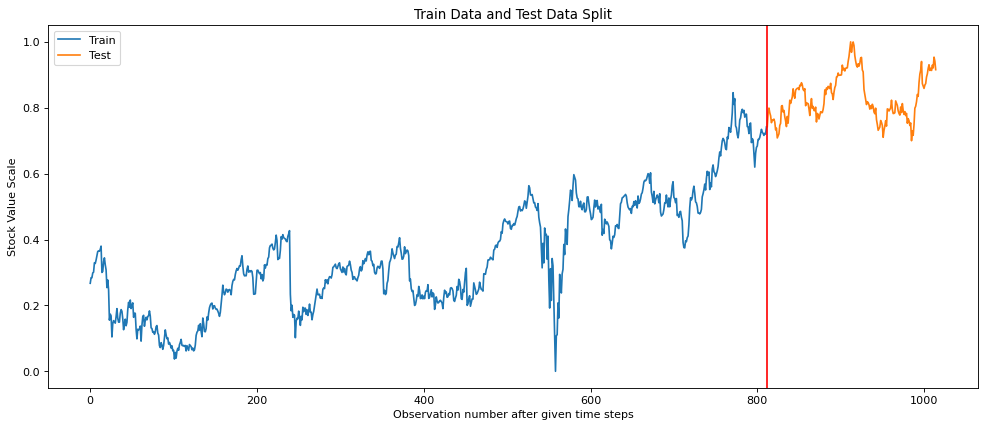

In [15]:
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(range(len(train_data)), train_data)
plt.plot(range(len(train_data),len(train_data)+len(test_data)), test_data)
plt.axvline(x=len(train_data), color='r')
plt.legend(['Train', 'Test'])
plt.xlabel('Observation number after given time steps')
plt.ylabel('Stock Value Scale')
plt.title('Train Data and Test Data Split')
plt.show()

Reshaping data for keras by diving the x(independent variables) and y(dependent variables).

In [6]:
def get_XY(dat, time_steps, delay = 0):
    Y_ind = np.arange(time_steps + delay, len(dat), 1)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = []
    for i in range(rows_x):
        X_ind = np.arange(i, i + time_steps, 1)
        temp = dat[X_ind]
        X.append(temp)
    X=np.array(X)
    # X = np.resize(X, (rows_x, time_steps, 1))
    # X = X.reshape(-1,1).reshape(rows_x, time_steps, 1)
    X= np.reshape(X, (X.shape[0], X.shape[1], 1))
    Y=np.reshape(Y, (Y.shape[0], 1))
    return X, Y
 
time_steps = 30
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)


Create RNN fodel and fit the train model

In [7]:
np.random.seed(9527)
tensorflow.random.set_seed(9527)
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
#callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
RNN=model.fit(trainX[:trainX.shape[0]-10,:,:], trainY[:trainX.shape[0]-10,:], epochs=20, batch_size=1, verbose=2,
              validation_data=(trainX[trainX.shape[0]-10:,:,:],trainY[trainX.shape[0]-10:,:]))

#RNN=model.fit(trainX[:trainX.shape[0]-10,:,:], trainY[:trainX.shape[0]-10,:], epochs=20, batch_size=1, verbose=2,
              #validation_data=(trainX[trainX.shape[0]-10:,:,:],trainY[trainX.shape[0]-10:,:]),
              #callbacks=[callback])


Epoch 1/20
772/772 - 3s - loss: 0.0073 - val_loss: 0.0176 - 3s/epoch - 3ms/step
Epoch 2/20
772/772 - 2s - loss: 0.0029 - val_loss: 0.0063 - 2s/epoch - 2ms/step
Epoch 3/20
772/772 - 2s - loss: 0.0020 - val_loss: 0.0046 - 2s/epoch - 2ms/step
Epoch 4/20
772/772 - 2s - loss: 0.0016 - val_loss: 0.0046 - 2s/epoch - 2ms/step
Epoch 5/20
772/772 - 2s - loss: 0.0014 - val_loss: 0.0033 - 2s/epoch - 2ms/step
Epoch 6/20
772/772 - 2s - loss: 0.0013 - val_loss: 0.0031 - 2s/epoch - 2ms/step
Epoch 7/20
772/772 - 2s - loss: 0.0012 - val_loss: 0.0053 - 2s/epoch - 2ms/step
Epoch 8/20
772/772 - 2s - loss: 0.0012 - val_loss: 0.0035 - 2s/epoch - 2ms/step
Epoch 9/20
772/772 - 2s - loss: 0.0011 - val_loss: 0.0021 - 2s/epoch - 2ms/step
Epoch 10/20
772/772 - 2s - loss: 9.7611e-04 - val_loss: 9.3226e-05 - 2s/epoch - 2ms/step
Epoch 11/20
772/772 - 2s - loss: 0.0010 - val_loss: 1.8103e-04 - 2s/epoch - 2ms/step
Epoch 12/20
772/772 - 2s - loss: 9.0576e-04 - val_loss: 1.1705e-04 - 2s/epoch - 2ms/step
Epoch 13/20
772/7

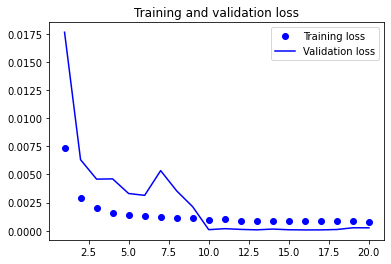

In [8]:
loss = RNN.history['loss']
val_loss = RNN.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
Bestmodel = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
Bestmodel.fit(trainX[:trainX.shape[0]-10,:,:], trainY[:trainX.shape[0]-10,:], epochs=6, batch_size=1, verbose=2,
              validation_data=(trainX[trainX.shape[0]-10:,:,:],trainY[trainX.shape[0]-10:,:]))

Epoch 1/6
772/772 - 3s - loss: 0.0491 - val_loss: 0.0227 - 3s/epoch - 3ms/step
Epoch 2/6
772/772 - 2s - loss: 0.0033 - val_loss: 0.0160 - 2s/epoch - 2ms/step
Epoch 3/6
772/772 - 2s - loss: 0.0029 - val_loss: 0.0109 - 2s/epoch - 2ms/step
Epoch 4/6
772/772 - 2s - loss: 0.0025 - val_loss: 0.0115 - 2s/epoch - 3ms/step
Epoch 5/6
772/772 - 2s - loss: 0.0022 - val_loss: 0.0086 - 2s/epoch - 3ms/step
Epoch 6/6
772/772 - 2s - loss: 0.0019 - val_loss: 0.0057 - 2s/epoch - 3ms/step


Compute and print the root mean square error. From the result, it show both train RMSE and test RMSE are small which means this model offer a good prediction.

In [10]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

Train RMSE: 0.027 RMSE
Test RMSE: 0.081 RMSE


Comparing predictions and actual value in plot. From the line plot, it shows the predicted values are really close to actual value.

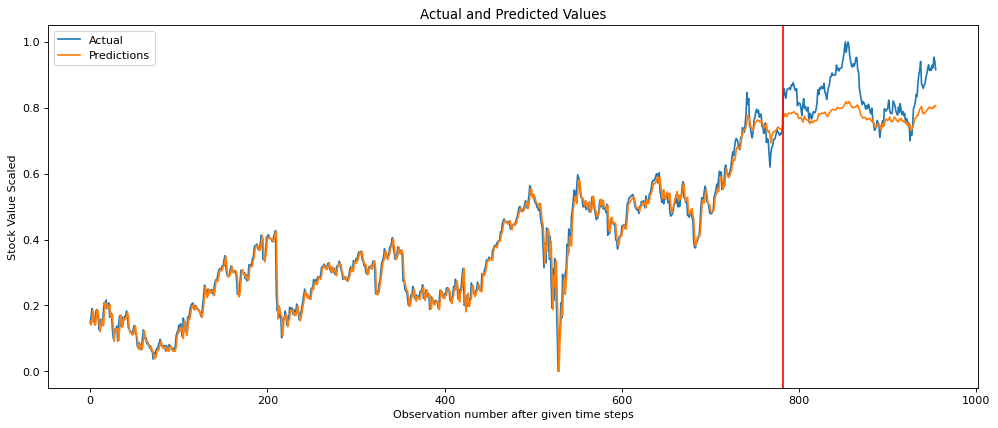

In [13]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    #rows = len(predictions)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(len(actual)), actual)
    plt.plot(range(len(predictions)), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Stock Value Scaled')
    plt.title('Actual and Predicted Values')
plot_result(trainY, testY, train_predict, test_predict)

Base on the prediction data and forest 50 days. 

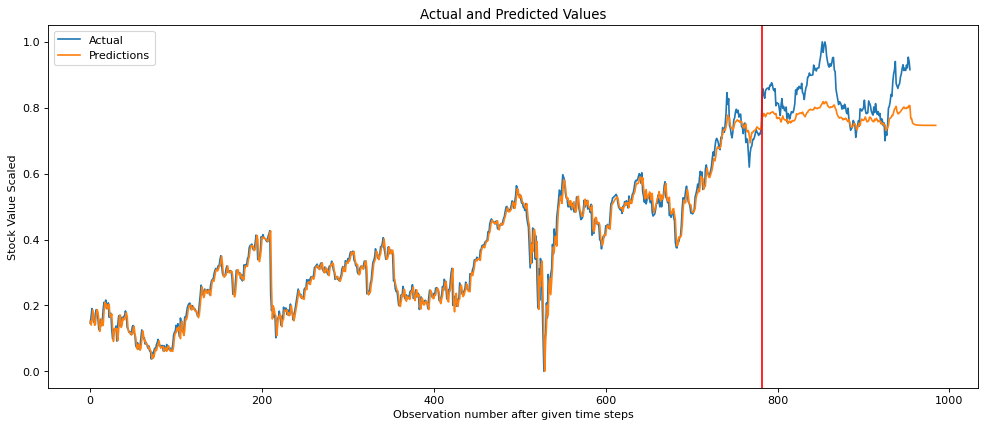

In [14]:

newX, newY = get_XY(test_predict, time_steps)
new_predict = np.append(test_predict,model.predict(np.array([newX[-1]])))
for i in range(29):
    newX, newY = get_XY(new_predict, time_steps)
    new_predict = np.append(new_predict,model.predict(np.array([newX[-1]])))
plot_result(trainY, testY, train_predict, new_predict)